In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tqdm import tqdm
from sklearn import metrics
import pandas as pd

from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from scipy.special import logsumexp
from scipy.stats import norm
from glob import glob
import pandas as pd
from glob import glob as glob



In [2]:
from CSWSEM import generate_exp, seed_exp
from vanilla_lstm import VanillaLSTM
from sem.event_models import NonLinearEvent

TensorFlow Version: 2.3.1


In [5]:
def parse_results_file(tresults_fpath):
  D = {}
  fsplit = tresults_fpath.split('/')[-1].split('_')
  D['seed'] = int(fsplit[-1].split('.')[0])
  D['nepochs'] = int(fsplit[-6])
  D['lr'] = float(fsplit[-8])
  return  D


def read_gsdf(data_dir):
  tresults_fL = glob(data_dir+"/trial*")
  L = []
  for fpath in tresults_fL:
    paramD = parse_results_file(fpath)
    seed_df = pd.read_csv(fpath)
    for k,v in paramD.items():
      seed_df[k] = v
    L.append(seed_df)
  gsdf = pd.concat(L)
  return gsdf

In [6]:
# gridsearch df
data_dir = 'gsdata/lstm1/'
gsdf = read_gsdf(data_dir)

In [7]:
meandf = gsdf.groupby(['nepochs','lr','t']).mean().accuracy
# meandf.iloc[:210].values == meandf.iloc[210:2*210].values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [8]:
acc_df

NameError: name 'acc_df' is not defined

In [10]:
acc_df = gsdf.groupby(['lr','nepochs','t']).mean().accuracy.unstack(-1)
acc_df
for (lr,nepchs),acc in acc_df.T.iteritems():
  print(lr,nepchs,acc.shape)
  plt.plot(acc)
  plt.ylim(.5,1.1)
  plt.savefig('figures/acc-%f_%i.png'%(lr,nepchs))
  plt.close('all')


0.001 1 (210,)
0.001 2 (210,)
0.001 4 (210,)
0.001 8 (210,)
0.001 16 (210,)
0.001 32 (210,)
0.001 64 (210,)
0.005 1 (210,)
0.005 2 (210,)
0.005 4 (210,)
0.005 8 (210,)
0.005 16 (210,)
0.005 32 (210,)
0.005 64 (210,)
0.01 1 (210,)
0.01 2 (210,)
0.01 4 (210,)
0.01 8 (210,)
0.01 16 (210,)
0.01 32 (210,)
0.01 64 (210,)
0.05 1 (210,)
0.05 2 (210,)
0.05 4 (210,)
0.05 8 (210,)
0.05 16 (210,)
0.05 32 (210,)
0.05 64 (210,)
0.1 1 (210,)
0.1 2 (210,)
0.1 4 (210,)
0.1 8 (210,)
0.1 16 (210,)
0.1 32 (210,)
0.1 64 (210,)


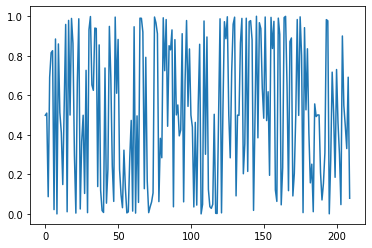

In [85]:
from matplotlib import pyplot as plt


### load files

In [ ]:

lr = 
n_epochs = 
seed = 
data_dir = 'gsdata/lstm1/'
model_tag = "LSTM_cond_single_lr_%.3f_nepchs_%i_alpha_%.3f-lambda_%.3f_seed_%i"%(
  lr,n_epochs,seed
)
print(model_tag)

In [ ]:
save_dir = 'gsdata/lstm1/'
model_tag = "%s_cond_%s_lr_%.3f_nepchs_%i_alpha_%.3f-lambda_%.3f_seed_%i"%(
  model_type,condition,lr,n_epochs,log_alpha,log_lambda,seed
)
print(model_tag)

### gridsearch params 

In [7]:
# convert from JSON file format (dict) to pandas df
results = pd.DataFrame(results)
trialXtrial = pd.DataFrame(trialXtrial)

In [3]:
# parameter search over lr, n_epochs, alpha, lambda
model_type        = str('LSTM')
lr                = float(0.01)
n_epochs          = int(1)    
log_alpha         = float(0.0)  # sCRP alpha is set in log scale
log_lambda        = float(0.0)  # sCRP lambda is set in log scale

In [4]:
seed = int(97)
condition = 'single'
# number of trials
n_train = 200
n_test = 10

### SEM configuration

In [5]:
optimizer_kwargs = dict(
    lr=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-5, amsgrad=False
) 

f_opts=dict(
  batch_size=25, 
  batch_update=False, 
  dropout=0.0,
  l2_regularization=0.0, 
  n_epochs=n_epochs,
  optimizer_kwargs=optimizer_kwargs
)

f_class = VanillaLSTM # event model class

# final param dict
sem_kwargs = dict(
  lmda=np.exp(log_lambda), 
  alfa=np.exp(log_alpha), 
  f_opts=f_opts, 
  f_class=f_class
)


# Run model

main fun call

In [6]:
""" 
main fun call
"""

results, trialXtrial, _ = seed_exp( 
              sem_kwargs, model_type=model_type, 
              n_train=n_train, n_test=n_test,
              condition=condition,seed=seed,
)

seed 97 condition single
seed in exp 97


//anaconda3/envs/sem/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# save


In [10]:
results_fpath = save_dir + "results_" + model_tag + '.csv'
trial_fpath = save_dir + "trial_X_trial_" + model_tag + '.csv'

LSTM_cond_single_lr_0.010_nepchs_1_alpha_0.000-lambda_0.000_seed_97


In [11]:
results.to_csv(results_fpath)
trialXtrial.to_csv(trial_fpath)